## Tugas Besar 1 
### MK Visualisasi Data Gasal 2020/2021

<b>Nama<b>: Alif Adwitiya Pratama <br> 
<b>NIM<b>: 1301190465

#### Aturan umum:
1. Setiap soal dievaluasi berdasarkan _code program_ dan penjelasan yang dibuat.
2. File _midterm project_ yang telah dikerjakan harus di-submit melalui LMS.
4. <b><font color='red'>Setiap tindakan plagiarism akan berakibat pada ketidaklulusan pada MK ini.</font><b>

### Kasus 1: Pima Indian Diabetes Data Set (Soal 1 - 2)
Dataset ini berasal dari the National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari pengumpulan dataset ini untuk dapat memprediksi secara diagnosis apakah seseorang mengidap penyakit diabetes atau tidak berdasarkan beberapa pengukuran diagnostik. Seluruh pasien pada dataset ini adalah perempuan keturunan India Pima yang berumur kurang dari 21 tahun.<br><br>
Dataset terdiri dari beberapa variabel prediktor medis dan satu variabel target sebagai _outcome_. Variabel prediktor di antaranya jumlah kehamilan, BMI, level insulin, usia, dll.lin level, age, and so on. Dataset dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/3i3gfr8pih4jwd4/diabetes.csv?dl=0)

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### Soal 1 (15 poin)
Tampilkan visualisasi distribusi data untuk variabel "Glucose" dan "Insulin", lalu jelaskan hasil distribusinya.

#### Code

In [2]:
#import data
df=pd.read_csv('./dataset/diabetes.csv')

In [3]:
#check jumlah null
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#find kurosis & skewness
glucoseSkew=df['Glucose'].skew()
glucoseKurtosis=df['Glucose'].kurtosis()

insulinSkew=df['Insulin'].skew()
insulinKurtosis=df['Insulin'].kurtosis()



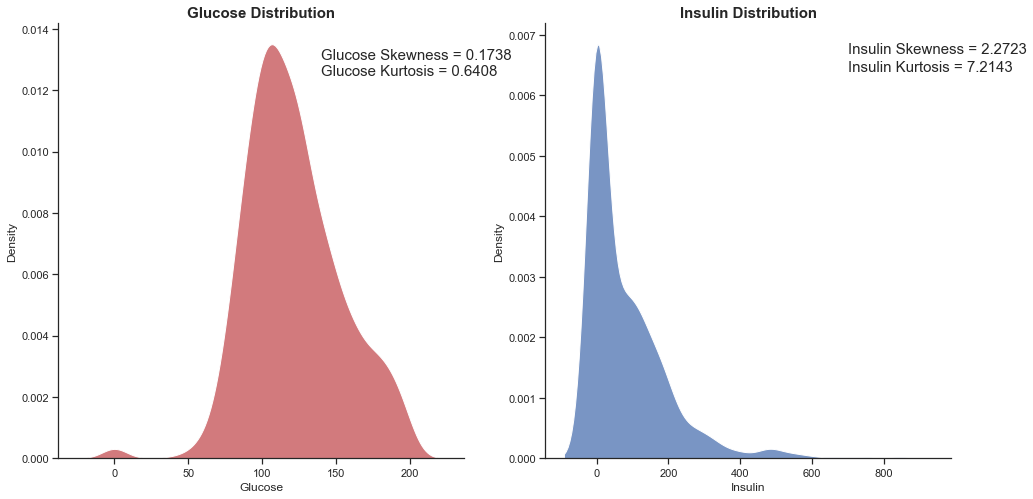

In [31]:
#check skewnes

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, axes = plt.subplots(1, 2,figsize=(16,8))

sns.kdeplot(df["Glucose"], 
            color='r',
            ax=axes[0], 
            multiple="stack")
axes[0].set_title("Glucose Distribution",fontdict={'fontsize':15,'fontweight':'bold'})
axes[0].text(140,0.013,f"Glucose Skewness = {glucoseSkew:0.4f}", fontsize=15)
axes[0].text(140,0.0125,f"Glucose Kurtosis = {glucoseKurtosis:0.4f}", fontsize=15)

sns.kdeplot(df["Insulin"],  
            color='b',
            ax=axes[1],
            multiple="stack")
axes[1].set_title("Insulin Distribution",fontdict={'fontsize':15,'fontweight':'bold'})
axes[1].text(700,0.0067,f"Insulin Skewness = {insulinSkew:0.4f}", fontsize=15)
axes[1].text(700,0.0064,f"Insulin Kurtosis = {insulinKurtosis:0.4f}", fontsize=15)

plt.show()

#### Penjelasan
untuk distribusi dari data **glucose** terlihat bahwa data tersebut memiliki skewness sebesar 0.1738 yang menandakan bahwa sebaran dari data tersebut cukup simetris serta memiliki kurtosis sebesar 0.6408 yang menandakan bahwa data memiliki puncak yang sedikit lancip

sedangkan untuk distribusi dari data **insulin** terlihat bahwa data tersebut memiliki skewness sebesar 2.2723 yang menandakan bahwa sebaran tersebut miring ke salah satu sisi hal ini. Selain itu,  memiliki kurtosis sebesar 7.2143 yang menandakan bahwa data ini memiliki puncak yang sangat lancip dan berpusat ketitik tertinggi. Dikarenakan data ini memiliki skewness besar dan juga data memiliki kurtosis yang besar kemungkinan data ini akan memiliki banyak outlier


### Soal 2 (25 poin)
Tampilkan visualisasi dari korelasi (i) antar variabel dan (ii) antara variabel dan target, lalu jelaskan hasil korelasinya.

#### Code

##### (i) antar variable

In [6]:
#define full correlation
matrix = df.corr().round(2)
matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [7]:
#define target correlation
targetOnlyCorr=matrix.loc['Outcome'].to_numpy()[:-1]
targetOnlyCol=matrix.loc['Outcome'].index[:-1]

targetOnlyCorr=pd.DataFrame({'Column':targetOnlyCol,'Target corr':targetOnlyCorr}).sort_values('Target corr')
targetOnlyCorr


,Column,Target corr
2,BloodPressure,0.07
3,SkinThickness,0.07
4,Insulin,0.13
6,DiabetesPedigreeFunction,0.17
0,Pregnancies,0.22
7,Age,0.24
5,BMI,0.29
1,Glucose,0.47


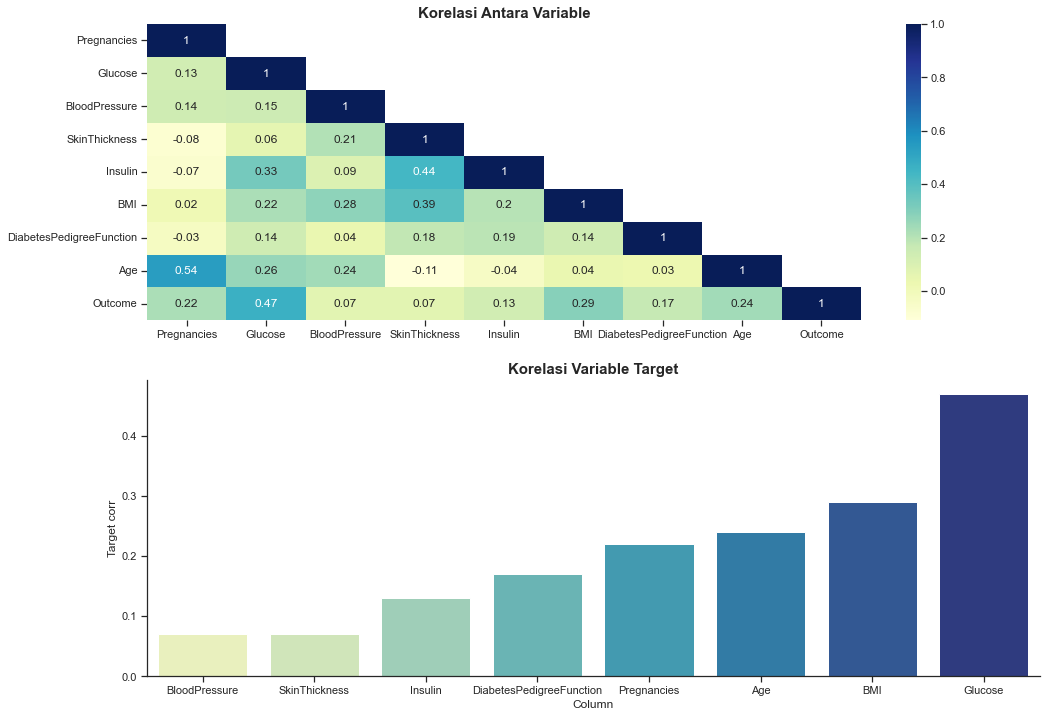

In [8]:
# type your code here
fig, axes = plt.subplots(2,1,figsize=(16,12))

#visualization section 
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask,k=1)] = True
sns.heatmap(matrix,
            annot=True,
            mask=mask,
            cmap="YlGnBu",
            ax=axes[0])

axes[0].set_title("Korelasi Antara Variable",fontdict={'fontsize':15,'fontweight':'bold'})

sns.barplot(x="Column", y="Target corr", 
            data=targetOnlyCorr,
            palette='YlGnBu',
            ax=axes[1])

axes[1].set_title("Korelasi Variable Target",fontdict={'fontsize':15,'fontweight':'bold'})



plt.show()


#### Penjelasan 
dari seluruh data yang digunakan ada beberapa variable yang saling berkaitan dan fitur tersebut dapat dihilangkan salah satunya  untuk mengurangi redudansi learning feature yang digunakan oleh model sehingga waktu training model dapat dikurangi diantaranya AGE-PREGNANCIES & INSULIN-SKINTHICKNESS. Selain itu adapun beberapa kolom yang dapat kita gunakan untuk dijadikan fitur dalam melakukan prediksi 3 diantaranya adalah GLUCOSE, BMI, dan Age

### Kasus 2: Stock Market Analysis (Soal 3 - 4)
Pada kasus ini, kita akan membandingkan beberapa parameter yang diturunkan dari data historis harga saham dari 3 perusahaan, yaitu Nasdaq, Nikkei dan Hang Seng. Data set dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/0wny6x5sio9nvap/stock_market.zip?dl=0).

### Soal 3 (30 poin)
Lakukanlah _trend analysis_ nilai _daily percentage change_ dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan melalui visualisasi data.
_Trend analysis_ dilakukan dengan menggunakan hubungan berikut:
![output%2011.png](https://www.dl.dropboxusercontent.com/s/dxmrm74ksz5l9v2/trend_analysis_fig.png?dl=0)

#### Code

In [9]:
# type your code here

#import data
dfHangseng=pd.read_csv('./dataset/Hang_Seng.csv',parse_dates=['Date']).set_index('Date').round(2)
dfNasdaq=pd.read_csv('./dataset/Nasdaq.csv',parse_dates=['Date']).set_index('Date').round(2)
dfNikkei=pd.read_csv('./dataset/Nikkei.csv',parse_dates=['Date']).set_index('Date').round(2)

#get 2019 only
dfHangseng = dfHangseng.loc['2019-01-01':'2019-12-31']
dfNasdaq = dfNasdaq.loc['2019-01-01':'2019-12-31']
dfNikkei = dfNikkei.loc['2019-01-01':'2019-12-31']

#find daily percent change
dfHangseng["dailyPercentChange"] = dfHangseng["Adj Close"].pct_change()*100
dfNasdaq["dailyPercentChange"] = dfNasdaq["Adj Close"].pct_change()*100
dfNikkei["dailyPercentChange"] = dfNikkei["Adj Close"].pct_change()*100

#it will make nan to first value, soo we need to fill first dailyPercentChange with 0
dfHangseng.loc[dfHangseng.index[0],'dailyPercentChange']=0
dfNasdaq.loc[dfNasdaq.index[0],'dailyPercentChange']=0
dfNikkei.loc[dfNikkei.index[0],'dailyPercentChange']=0


dfHangseng

,Open,High,Low,Close,Adj Close,Volume,dailyPercentChange
Date,,,,,,,
2019-01-02,25824.44,25824.44,25055.27,25130.35,25130.35,1.666316e+09,0.000000
2019-01-03,25077.68,25262.21,24896.87,25064.36,25064.36,1.481292e+09,-0.262591
2019-01-04,24946.12,25626.03,24924.73,25626.03,25626.03,1.708572e+09,2.240911
2019-01-07,26015.84,26043.64,25753.46,25835.70,25835.70,1.447090e+09,0.818192
2019-01-08,25852.50,25960.89,25688.50,25875.45,25875.45,1.578206e+09,0.153857
...,...,...,...,...,...,...,...
2019-12-23,28024.62,28024.62,27830.08,27906.41,27906.41,1.216834e+09,0.125792
2019-12-24,27901.51,27921.29,27792.66,27864.21,27864.21,4.839841e+08,-0.151220
2019-12-27,28033.66,28226.11,28000.62,28225.42,28225.42,1.375016e+09,1.296322


In [10]:
#make tren function

def trendMapper(x):
    if x > -0.5 and x <= 0.5:
        return "Slight or No change"
    elif x > 0.5 and x <= 1:
        return "Slight Positive"
    elif x > -1 and x <= -0.5:
        return "Slight Negative"
    elif x > 1 and x <= 3:
        return "Positive"
    elif x > -3 and x <= -1:
        return "Negative"
    elif x > 3 and x <= 7:
        return "Among top gainers"
    elif x > -7 and x <= -3:
        return "Among top losers"
    elif x > 7:
        return "Bull run"
    elif x <= -7:
        return "Bear drop"

#find trend
dfHangseng["trend"]= dfHangseng["dailyPercentChange"].apply(lambda x:trendMapper(x))
dfNasdaq["trend"]= dfNasdaq["dailyPercentChange"].apply(lambda x:trendMapper(x))
dfNikkei["trend"]= dfNikkei["dailyPercentChange"].apply(lambda x:trendMapper(x))

dfHangseng

,Open,High,Low,Close,Adj Close,Volume,dailyPercentChange,trend
Date,,,,,,,,
2019-01-02,25824.44,25824.44,25055.27,25130.35,25130.35,1.666316e+09,0.000000,Slight or No change
2019-01-03,25077.68,25262.21,24896.87,25064.36,25064.36,1.481292e+09,-0.262591,Slight or No change
2019-01-04,24946.12,25626.03,24924.73,25626.03,25626.03,1.708572e+09,2.240911,Positive
2019-01-07,26015.84,26043.64,25753.46,25835.70,25835.70,1.447090e+09,0.818192,Slight Positive
2019-01-08,25852.50,25960.89,25688.50,25875.45,25875.45,1.578206e+09,0.153857,Slight or No change
...,...,...,...,...,...,...,...,...
2019-12-23,28024.62,28024.62,27830.08,27906.41,27906.41,1.216834e+09,0.125792,Slight or No change
2019-12-24,27901.51,27921.29,27792.66,27864.21,27864.21,4.839841e+08,-0.151220,Slight or No change
2019-12-27,28033.66,28226.11,28000.62,28225.42,28225.42,1.375016e+09,1.296322,Positive


In [11]:
# it is necessary to pay attention to the following 3 data frame, there some label missing in another data frame
print('label Hangseng')
print(dfHangseng.groupby('trend')['trend'].count(),end="\n\n")

print('label Nasdaq')
print(dfNasdaq.groupby('trend')['trend'].count(),end="\n\n")

print('label Nikkei')
print(dfNikkei.groupby('trend')['trend'].count(),end="\n\n")

label Hangseng
trend
Among top gainers        1
Negative                29
Positive                32
Slight Negative         28
Slight Positive         36
Slight or No change    120
Name: trend, dtype: int64

label Nasdaq
trend
Among top gainers        1
Among top losers         4
Negative                23
Positive                43
Slight Negative         23
Slight Positive         42
Slight or No change    116
Name: trend, dtype: int64

label Nikkei
trend
Among top losers         1
Negative                17
Positive                28
Slight Negative         35
Slight Positive         32
Slight or No change    128
Name: trend, dtype: int64



Text(0.5, 0.77, 'Trend Persentase Perubahan Harian selama tahun 2019 dari ketiga perusahaan ')

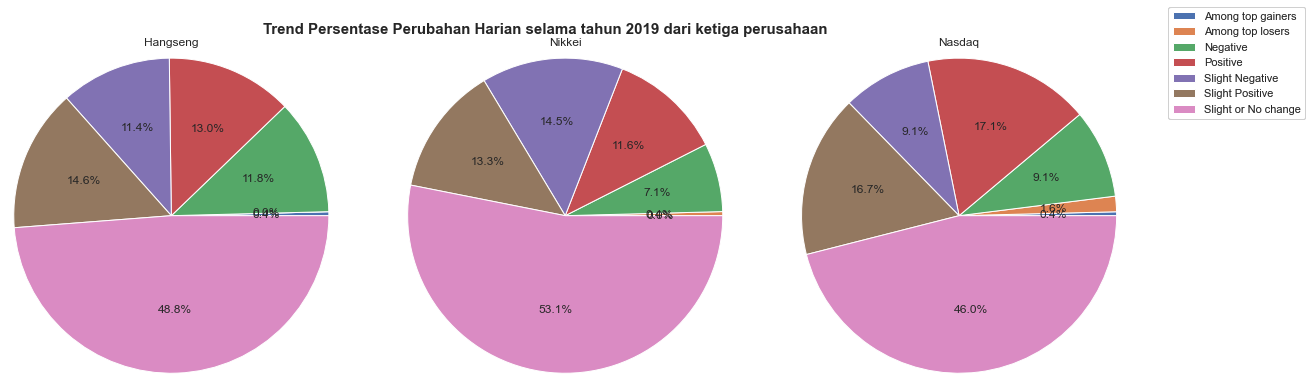

In [12]:
fig,axes = plt.subplots(1,3,figsize=(20,10))


#make datalist to make iterable data
dataList=[{"name":"Hangseng","data":dfHangseng},
            {"name":"Nikkei","data":dfNikkei},
            {"name":"Nasdaq","data":dfNasdaq},]


#iterate over data and make visualization
for i in range(3):
    dataGroup=dataList[i]['data'].groupby('trend')['trend'].count()
    
    # fill missing label
    if dataList[i]['name'] == 'Hangseng':
        dataGroup.loc['Among top losers']=0
    
    if dataList[i]['name'] == 'Nikkei':
        dataGroup.loc['Among top gainers']=0
        
    #reindex data and make it to label
    dataGroup=dataGroup.reindex(["Among top gainers","Among top losers","Negative","Positive","Slight Negative","Slight Positive","Slight or No change"])
    label=dataGroup.index
    
    
    
    axes[i].pie(dataGroup,
                autopct = '%1.1f%%', 
                radius = 1.2,
                )
    
    axes[i].set_title(dataList[i]['name'], fontdict={'fontsize':12})
    fig.legend(labels=label, bbox_to_anchor=(1.03,0.8))
fig.suptitle("Trend Persentase Perubahan Harian selama tahun 2019 dari ketiga perusahaan ",size=15,fontweight='bold',y = 0.77)



#### Penjelasan 

dari visualisasi diatas kita mendapatkan informasi bahwa pada tahun 2019 saham ketiga perusahaan tersebut  memiliki trend mayoritas adalah **Slight or No change** sehingga menggambarkan bahwa harga penutupan harian saham pada tahun 2019 cenderung bergerak ditempat selain itu hal ini juga dibuktikan dengan sedikitnya pergerakan **among top gainer & among top loser** serta dan tidak adanya **bull run & bear drop** 

### Soal 4 (30 poin)
Lakukanlah analisis volatilitas dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan hasil visualisasinya.

#### Code

In [13]:
# type your code here
dfAdjClose = pd.concat([dfHangseng["Adj Close"], dfNasdaq["Adj Close"], dfNikkei["Adj Close"]], axis = 1)
#rename column
dfAdjClose.columns=["Nasdaq", "Hang Seng", "Nikkei"]
#reset index 
dfAdjClose = dfAdjClose.reset_index()
#drop column date
dfAdjClose = dfAdjClose.drop(["Date"], axis = 1)

dfAdjClose

,Nasdaq,Hang Seng,Nikkei
0,25130.35,6665.94,NaN
1,25064.36,6463.50,NaN
2,25626.03,6738.86,19561.96
3,25835.70,6823.47,20038.97
4,25875.45,6897.00,20204.04
...,...,...,...
255,NaN,NaN,23782.87
256,NaN,9022.39,23924.92
257,28225.42,9006.62,23837.72
258,28319.39,8945.99,23656.62


In [14]:
#drop nan value
dfAdjClose.dropna(inplace = True, axis = 0)

#find daily percent change
dailyPercentChange = dfAdjClose.pct_change()*100

#drop null daily Percent change
dailyPercentChange.dropna(inplace = True, how = "any", axis = 0)

dailyPercentChange

,Nasdaq,Hang Seng,Nikkei
3,0.818192,1.255554,2.438457
4,0.153857,1.077604,0.823745
5,2.268057,0.871103,1.103839
6,0.223374,0.416698,-1.288781
7,0.549895,-0.208844,0.971543
...,...,...,...
252,0.254888,0.424655,-0.202054
253,0.125792,0.231822,0.018810
254,-0.151220,0.080821,0.039755
257,1.296322,0.600254,0.029962


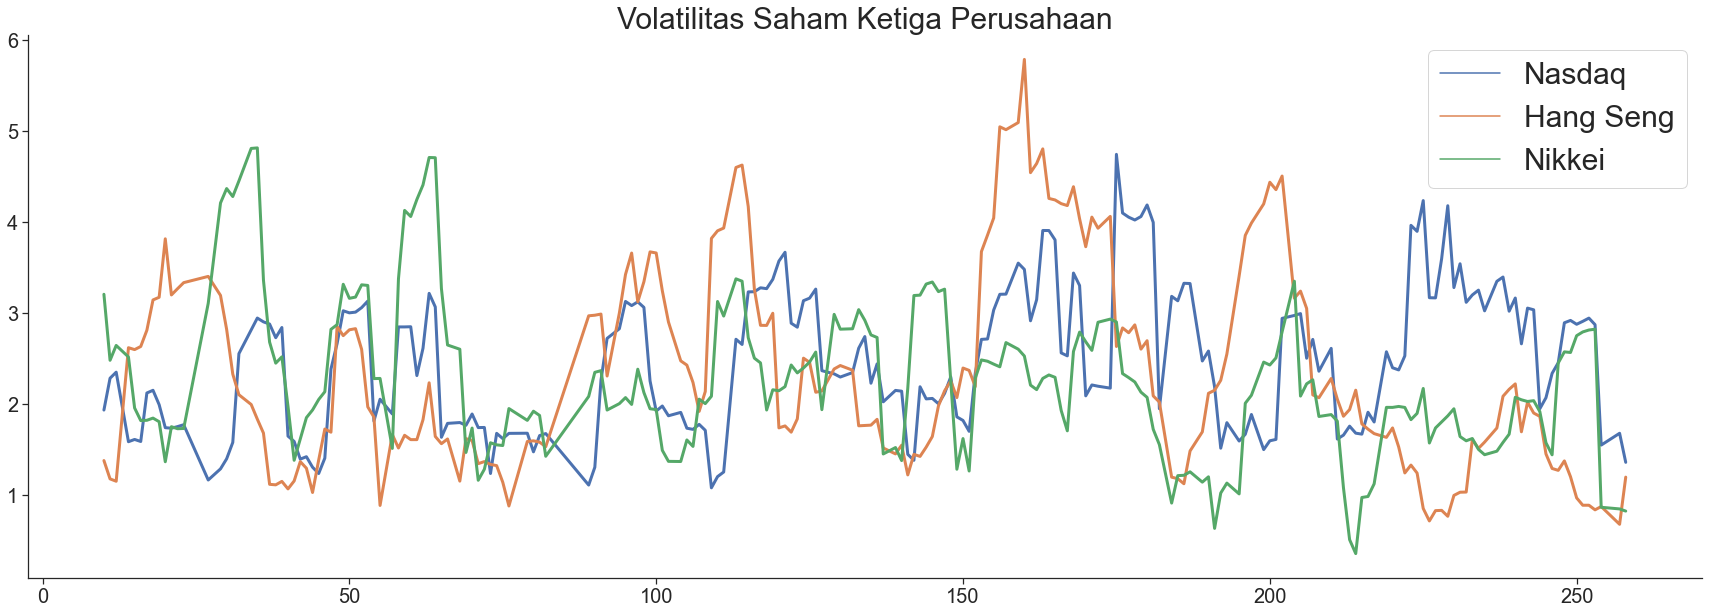

In [25]:
sns.axes_style("ticks")

volatility = dailyPercentChange[['Nasdaq', 'Hang Seng', 'Nikkei']].rolling(7).std()*np.sqrt(7)
fig,axes = plt.subplots(figsize=(30,10))


sns.lineplot(data=volatility,ax=axes,dashes=False,linewidth =3)
axes.set_title('Volatilitas Saham Ketiga Perusahaan', fontdict={'fontsize':30})
axes.legend(fontsize=30)
axes.tick_params(labelsize=20)


plt.show()


#### Penjelasan 

Dari visualisasi diatas dapat diamati bahwa violitas ketiga perusahaan cukup mirip dan berganti - gantian menjadi yang tertinggi dan terendah. Pada awalnya saham nikkei yang memiliki violitas tertinggi namun pada pertengahan  saham Hang Seng membuat puncak tertinggi dan pada akhir perusahaan nasdaq memimpin. Sebaliknya perusahan nikkei yang awalnya violitas tertinggi diakhir menjadi violitas terendah pada akhir plot